In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
merge_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mouse_count = merge_df["Mouse ID"].count()

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df["Mouse ID"].value_counts()
new_index = merge_df.set_index("Mouse ID")

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
g989.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,13.0,13.0,13.000000,13.000000,13.000000
mean,21.0,26.0,14.615385,52.341020,0.538462
std,0.0,0.0,11.079549,5.243412,0.660225
min,21.0,26.0,0.000000,45.000000,0.000000
25%,21.0,26.0,5.000000,48.786801,0.000000
50%,21.0,26.0,15.000000,51.745156,0.000000
75%,21.0,26.0,20.000000,55.326122,1.000000
max,21.0,26.0,35.000000,62.570880,2.000000


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Clear out g989 data
clean_df = new_index.drop(index = "g989")
clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df["Drug Regimen"].count()
mouse_count

1880

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

avg = clean_df.groupby(["Drug Regimen"]).mean()
avg = avg.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Avg"})
drug_avg = avg["Tumor Volume Avg"]


med = clean_df.groupby(["Drug Regimen"]).median()
med = med.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Med"})
drug_med = med["Tumor Volume Med"]


var = clean_df.groupby(["Drug Regimen"]).var()
var = var.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Var"})
drug_var = var["Tumor Volume Var"]


stdev = clean_df.groupby(["Drug Regimen"]).std()
stdev = stdev.rename(columns={"Tumor Volume (mm3)":"Tumor Volume StDev"})
drug_stdev = stdev["Tumor Volume StDev"]


SEM = clean_df.groupby(["Drug Regimen"]).sem()
SEM = SEM.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM"})
drug_sem = SEM["Tumor Volume SEM"]

# Comibine all Drug Regimen data points into a single DataFrame
drug_summary = pd.DataFrame({"Tumor Volume Mean": drug_avg,
                             "Tumor Volume Median": drug_med,
                             "Tumor Volume Variance": drug_var,
                             "Tumor Volume Standard Deviation": drug_stdev,
                             "Tumor Volume Standard Error of Means": drug_sem})

drug_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_agg = clean_df.groupby(["Drug Regimen"])
drug_agg_avg = drug_agg.agg("mean")
drug_agg_med = drug_agg.agg("median")
drug_agg_var = drug_agg.agg("var")
drug_agg_stdev = drug_agg.agg("std")
drug_agg_sem = drug_agg.agg("sem")
drug_aggregate_summary = pd.DataFrame({"Tumor Volume Mean": drug_agg_avg["Tumor Volume (mm3)"],
                                       "Tumor Volume Median": drug_agg_med["Tumor Volume (mm3)"],
                                       "Tumor Volume Variance": drug_agg_var["Tumor Volume (mm3)"],
                                       "Tumor Volume Standard Deviation": drug_agg_stdev["Tumor Volume (mm3)"],
                                       "Tumor Volume Standard Error of Means": drug_agg_sem["Tumor Volume (mm3)"]})
drug_aggregate_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, '# of Mice')

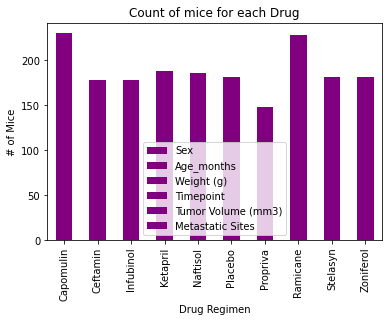

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
clean_count_grouped = clean_df.groupby("Drug Regimen").count()
bar_chart = clean_count_grouped.plot(kind="bar", title="Count of mice for each Drug", color="purple")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("# of Mice")


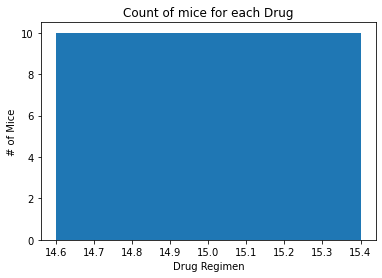

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(15, clean_count_grouped["Sex"], align="center")
plt.title("Count of mice for each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
